<a href="https://colab.research.google.com/github/Kbcity1/checkpoint/blob/master/Streamlit_checkpoint_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Install the necessary packages
Import you data and perform basic data exploration phase
Display general information about the dataset
Create a pandas profiling reports to gain insights into the dataset
Handle Missing and corrupted values
Remove duplicates, if they exist
Handle outliers, if they exist
Encode categorical features
Based on the previous data exploration train and test a machine learning classifier
Create a streamlit application (locally) and add input fields for your features and a validation button at the end of the form
Import your ML model into the streamlit application and start making predictions given the provided features values
Deploy your application on Streamlit share:
Create a github and a streamlit share accounts
Create a new git repo
Upload your local code to the newly created git repo
log in to your streamlit account an deploy your application from the git repo

"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset
data = pd.read_csv('/content/Financial_inclusion_dataset.csv')
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [2]:
unique_categories = data['location_type'].unique()
print(unique_categories)

['Rural' 'Urban']


In [3]:
unique_categories = data['job_type'].unique()
print(unique_categories)

['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']


In [4]:
unique_categories = data['cellphone_access'].unique()
print(unique_categories)

['Yes' 'No']


In [5]:
unique_categories = data['gender_of_respondent'].unique()
print(unique_categories)

['Female' 'Male']


In [6]:
unique_categories = data['education_level'].unique()
print(unique_categories)

['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA']


In [7]:
unique_categories = data['country'].unique()
print(unique_categories)

['Kenya' 'Rwanda' 'Tanzania' 'Uganda']


In [8]:
data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [9]:
#Display general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [10]:
# Summary statistics of the dataset
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [11]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 68.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3b615622611dda4867e1c4ba2122b32cef94308e339fffed3a60b47f4ce44be0
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [12]:
#Create a pandas profiling reports to gain insights into the dataset
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Financial Inclusion", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
# Handle Missing
data.isnull().sum()

,0
country,0
year,0
uniqueid,0
bank_account,0
location_type,0
cellphone_access,0
household_size,0
age_of_respondent,0
gender_of_respondent,0
relationship_with_head,0


In [14]:
#Handle corrupted values
data.isna().sum()

,0
country,0
year,0
uniqueid,0
bank_account,0
location_type,0
cellphone_access,0
household_size,0
age_of_respondent,0
gender_of_respondent,0
relationship_with_head,0


In [15]:
# Remove duplicates, if they exist
data.duplicated().sum()

0

In [16]:
# Encode categorical features
data.select_dtypes(include=['object']).columns

Index(['country', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')

In [17]:
# Encode categorical features
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical feature
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

In [18]:
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,0,1,0,1,3,24,0,5,2,3,9
1,0,2018,1111,0,0,0,5,70,0,1,4,0,4
2,0,2018,2222,1,1,1,5,26,1,3,3,5,9
3,0,2018,3333,0,0,1,5,34,0,1,2,2,3
4,0,2018,4444,0,1,0,8,26,1,0,3,2,5


In [19]:
unique_categories = data['location_type'].unique()
print(unique_categories)

[0 1]


In [20]:
unique_categories = data['country'].unique()
print(unique_categories)

[0 1 2 3]


In [21]:
unique_categories = data['cellphone_access'].unique()
print(unique_categories)

[1 0]


In [22]:
unique_categories = data['age_of_respondent'].unique()
print(unique_categories)

[ 24  70  26  34  32  42  54  76  40  69  64  31  38  47  27  48  25  21
  18  22  58  55  62  29  35  45  67  19  80  66  50  33  28  51  16  17
  30  37  59  65  46  56  52  23  43  49  44  72  53  63  39  81  78  36
  20  60  95  71  57  85  68  41  61  75  86  73  93  74  88  90  77  84
  82  89  79  83  94  87  92  91  98  97  96  99 100]


In [23]:
unique_categories = data['gender_of_respondent'].unique()
print(unique_categories)

[0 1]


In [24]:
unique_categories = data['education_level'].unique()
print(unique_categories)

[3 0 5 2 4 1]


In [25]:
unique_categories = data['job_type'].unique()
print(unique_categories)

[9 4 3 5 2 1 8 7 0 6]


In [26]:
data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,0,1,0,1,3,24,0,5,2,3,9
1,0,2018,1111,0,0,0,5,70,0,1,4,0,4
2,0,2018,2222,1,1,1,5,26,1,3,3,5,9
3,0,2018,3333,0,0,1,5,34,0,1,2,2,3
4,0,2018,4444,0,1,0,8,26,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2018,1239,0,0,1,4,48,0,1,0,0,7
23520,3,2018,1240,0,0,1,2,27,0,1,3,3,7
23521,3,2018,1241,0,0,1,5,27,0,4,4,2,7
23522,3,2018,1242,0,1,1,7,30,0,4,0,3,9


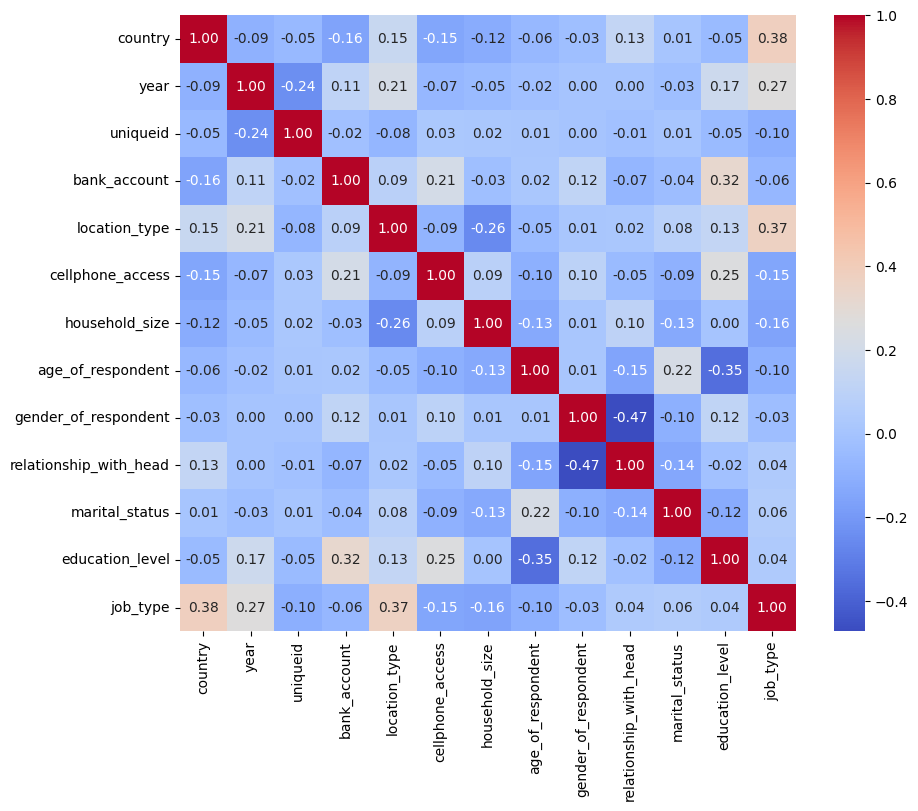

In [27]:
# Calculate the correlation matrix
corr = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size of the figure
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.show()

In [28]:
# Split the data into features (X) and target variable (y)
X = data[['job_type', 'location_type','country','education_level', 'gender_of_respondent', 'age_of_respondent', 'cellphone_access']]
y = data['bank_account']

In [29]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Model Training
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [31]:
# Model Prediction
y_pred = clf.predict(X_test)

In [32]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report # Import the necessary functions

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4063
           1       0.50      0.39      0.44       642

    accuracy                           0.86      4705
   macro avg       0.70      0.66      0.68      4705
weighted avg       0.85      0.86      0.86      4705



Confusion Matrix:


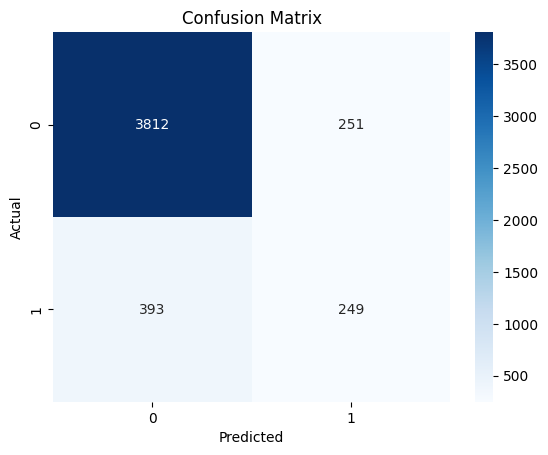

In [33]:
from sklearn.metrics import confusion_matrix # Import confusion_matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
import pickle

In [35]:
with open('clf.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)

In [36]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [37]:
%%writefile app.py

import pickle
import streamlit as st
import numpy as np

# Title of the application
st.title('Financial Inclusion Prediction')

# Load the trained machine learning model
def load_model():
    with open('clf.pkl', 'rb') as model_file:
        model = pickle.load(model_file)
    return model
model = load_model()


# Define mappings for categorical features based on the encoding used during training
job_type_mapping = {'Self employed':9, 'Government Dependent':4, 'Formally employed Private':3, 'Informally employed':5, 'Formally employed Government':2,'Farming and Fishing':1, 'Remittance Dependent': 8, 'Other Income':7,'Dont Know/Refuse to answer':0, 'No Income':6}
location_type_mapping = {'Rural': 0, 'Urban': 1}
country_mapping = {'Kenya':0, 'Rwanda':1, 'Tanzania':2, 'Uganda':3}
education_level_mapping = {'Secondary education':3, 'No formal education':0, 'Vocational/Specialised training':5, 'Primary education':2,'Tertiary education':4, 'Other/Dont know/RTA':1}
gender_mapping = {'Female':0, 'Male':1}
cellphone_access_mapping = {'Yes':1, 'No':0}

# Streamlit app title
st.title('Financial Inclusion Prediction')

# Input fields for each feature
job_type = st.radio('Job Type', list(job_type_mapping.keys()))
location_type = st.radio('Location Type', list(location_type_mapping.keys()))
country = st.selectbox('Country', list(country_mapping.keys()))
education_level = st.radio('Education Level', list(education_level_mapping.keys()))
gender = st.radio('Gender', list(gender_mapping.keys()))
age_of_respondent = st.number_input('Age of Respondent', min_value=0, max_value=100, value=25)
cellphone_access = st.radio('Cellphone Access', list(cellphone_access_mapping.keys()))

# Map the inputs to encoded values
job_type_encoded = job_type_mapping[job_type]
location_type_encoded = location_type_mapping[location_type]
country_encoded = country_mapping[country]
education_level_encoded = education_level_mapping[education_level]
gender_encoded = gender_mapping[gender]
cellphone_access_encoded = cellphone_access_mapping[cellphone_access]

# Predict button
if st.button('Predict'):
    # Combine all inputs into a single array in the order the model expects
    features = np.array([job_type_encoded, location_type_encoded, country_encoded, education_level_encoded, gender_encoded, age_of_respondent, cellphone_access_encoded]).reshape(1, -1)

    # Make prediction
    prediction = model.predict(features)

    # Display the result
    if prediction[0] == 1:
        st.write('The model predicts that this individual is likely to have a bank account.')
    else:
        st.write('The model predicts that this individual is unlikely to have a bank account.')

Writing app.py


In [38]:
X_train

,job_type,location_type,country,education_level,gender_of_respondent,age_of_respondent,cellphone_access
12033,5,1,1,2,0,18,1
11888,5,0,1,3,0,49,1
20909,5,1,2,2,1,41,1
22785,7,0,3,2,0,25,0
14323,5,0,1,2,1,46,1
...,...,...,...,...,...,...,...
11964,1,0,1,2,0,27,1
21575,9,0,3,2,0,40,1
5390,2,0,0,4,0,35,1
860,9,1,0,4,1,42,1


In [39]:
features = ['1', '0', '49']

In [40]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
added 22 packages in 3s
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴

In [1]:
!streamlit run app.py & npx localtunnel --port 8501 & curl -s ipv4.icanhazip.com

34.145.210.22
⠙⠹

your url is: https://angry-badgers-draw.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.145.210.22:8501

  Stopping...
